In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import dlsfunctions as dls
import seaborn as sns
import pandas as pd

In [2]:
%%latex
Let's see if we can normalize the output distribution in Bayes Take 13

<IPython.core.display.Latex object>

In [3]:
r = 2.24e-9
diameter = r * 2 + 3e-9
sigma = 1e-10

m = 20
c = 1
eta = 1e-3
n = 1.33 
theta = np.pi/2
k_b = 1.38e-23
t = 298.15
lambda_0 = 638e-9
beta = 1

time_in = np.linspace(1e-4, 1e-1, 200)*0.001
gamma = dls.calc_gamma(m, c, eta, n, theta, k_b, t, lambda_0)

d = np.linspace(5e-10, 9e-9, 20)
f_1 = dls.generate_distribution(d, diameter, sigma, c)

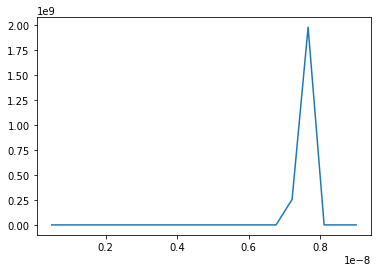

In [11]:
theta_input = np.append(f_1, beta)
plt.plot(d, f_1)

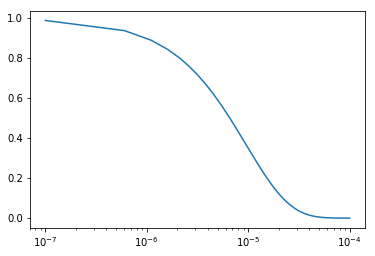

In [10]:
sim_data = dls.g2(theta_input, d, m, gamma, time_in)
plt.semilogx(time_in, sim_data)

In [6]:
ndim = 21
nwalkers = 100
nsteps = 3000

In [12]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)


AttributeError: 'list' object has no attribute 'shape'

In [8]:
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time_in)

In [9]:
result = sampler.run_mcmc(start_pos, nsteps)
sampler.acceptance_fraction

/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))


emcee: Exception while calling your likelihood function:
  params: [ 2.47349733e-05  1.57490487e-05 -6.78170228e-05  3.62048976e-05
 -4.69198035e-06  3.22767167e-05  1.68542712e-05  6.95086393e-05
 -4.93227931e-05  3.57143621e-05  1.42545172e-06 -1.89892735e-05
 -7.17205514e-05 -5.21969024e-05  6.68734800e-02  2.55284930e+08
  1.98000916e+09  3.12180465e+01 -5.44722684e-05  6.07160227e-05
  1.00003063e+00]
  args: (array([5.00000000e-10, 9.47368421e-10, 1.39473684e-09, 1.84210526e-09,
       2.28947368e-09, 2.73684211e-09, 3.18421053e-09, 3.63157895e-09,
       4.07894737e-09, 4.52631579e-09, 4.97368421e-09, 5.42105263e-09,
       5.86842105e-09, 6.31578947e-09, 6.76315789e-09, 7.21052632e-09,
       7.65789474e-09, 8.10526316e-09, 8.55263158e-09, 9.00000000e-09]), array([9.89559008e-01, 9.38768901e-01, 8.90586121e-01, 8.44876795e-01,
       8.01513926e-01, 7.60377036e-01, 7.21351838e-01, 6.84329911e-01,
       6.49208403e-01, 6.15889742e-01, 5.84281369e-01, 5.54295476e-01,
       5.25

Traceback (most recent call last):
  File "/home/tle3/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/home/tle3/pydls/dlsfunctions.py", line 121, in log_posterior
    return log_prior(theta, m) + log_likelihood(theta, d, y, m, gamma, time)
  File "/home/tle3/pydls/dlsfunctions.py", line 108, in log_likelihood
    g2_result = g2(theta, d, m, gamma, time)
  File "/home/tle3/pydls/dlsfunctions.py", line 69, in g2
    expo = np.exp(-(gamma*time[i])/d)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
start_pos1 = [theta_input + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [ ]:
sampler1 = emcee.EnsembleSampler(nwalkers, ndim, dls.log_posterior,args=(d, sim_data, m, gamma, time_in))

In [ ]:
result1 = sampler1.run_mcmc(start_pos, nsteps)
sampler1.acceptance_fraction

In [ ]:
dls.check_distribution_norm(f_1, d[1] - d[0])

In [ ]:
plt.semilogx(time_in, sim_data)